In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

# Leitura do CSV

In [3]:
df = pd.read_csv('tempo.csv', sep=';')

In [4]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

# Olhando Atributos Categóricos

In [6]:
# Olhando atributos categoricos
df.groupby('Aparencia').size()
df['Aparencia'] = df['Aparencia'].replace({'menos': 'sol'})
df.groupby('Aparencia').size()


Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [7]:
df.groupby('Vento').size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [8]:
df.groupby('Jogar').size()

Jogar
nao    5
sim    9
dtype: int64

# Olhando Atributos Númericos

In [9]:
# Temperatura
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

## Análise Gráfica (Temperatura)

Text(0.5, 1.0, 'Box Plot Enviesado')

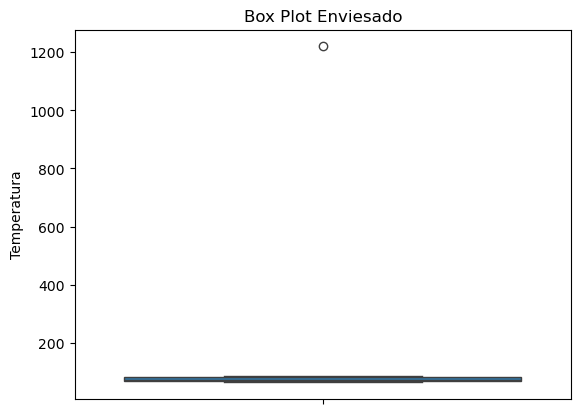

In [10]:
sns.boxplot(df['Temperatura']).set_title('Box Plot Enviesado')

<Axes: xlabel='Temperatura', ylabel='Count'>

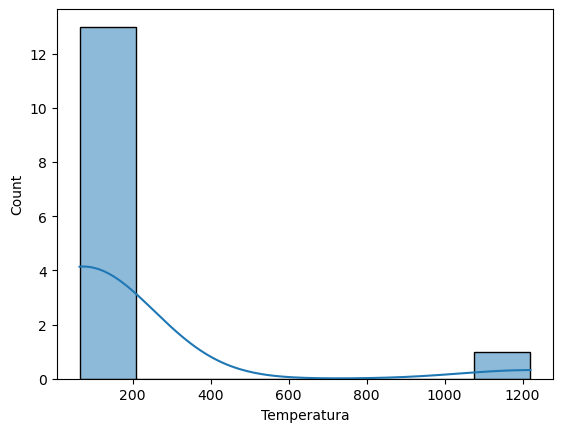

In [11]:
sns.histplot(df['Temperatura'], kde=True)

In [12]:
# Ajustando enviesamento
df.loc[df['Temperatura'] == 1220, 'Temperatura'] = 73.5

C:\Users\gabri\AppData\Local\Temp\ipykernel_7864\49183047.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Temperatura'] == 1220, 'Temperatura'] = 73.5


In [13]:
df['Temperatura'].describe()
# Observamos que fizemos o tratamento efetivo desse enviesamento

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [14]:
# Umidade
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [15]:
# Preenchimento de NaN's
media = df['Umidade'].mean()
df.fillna(media, inplace=True)

## Análise Gráfica (Umidade)

<Axes: ylabel='Umidade'>

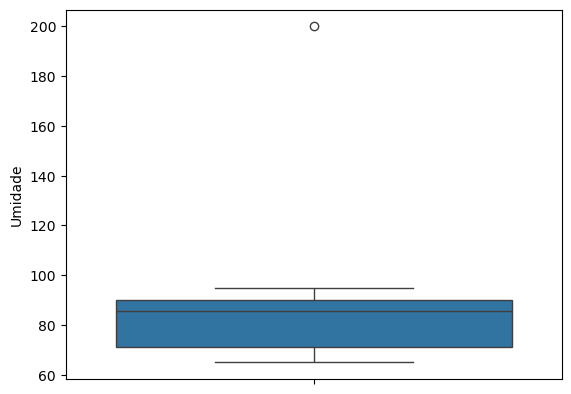

In [16]:
sns.boxplot(df['Umidade'])

In [17]:
df.loc[df['Umidade'] == 200, 'Umidade'] = 89.76

<Axes: ylabel='Umidade'>

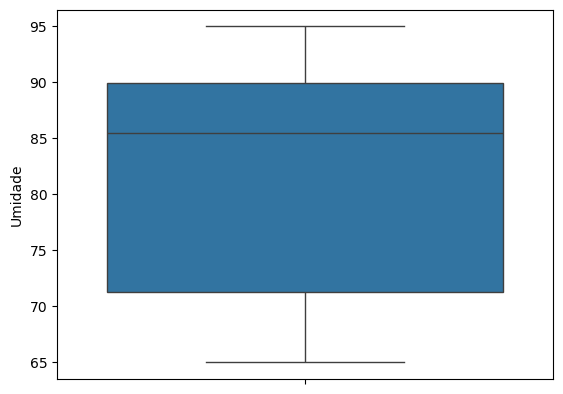

In [18]:
sns.boxplot(df['Umidade'])

<Axes: xlabel='Umidade', ylabel='Count'>

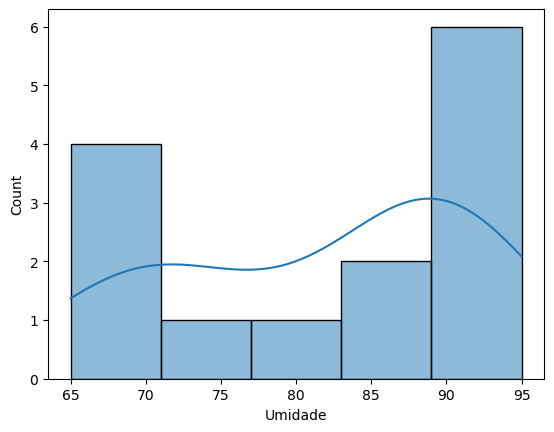

In [19]:
sns.histplot(df['Umidade'], kde=True)

Podemos observar que o gráfico acima possui uma assimetria negativa não é interessante eu tratar um outlier com a média

In [20]:
moda = df['Umidade'].mode()
moda

0    70.0
Name: Umidade, dtype: float64

In [28]:
df['Umidade'] = df['Umidade'].round(2)
df.loc[df['Umidade'] == 89.77, 'Umidade'] = 70

In [29]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,70.0,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
